In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import itertools
import collections
from math import inf
import pickle
import numpy as np
#import plotly.plotly as py
#import plotly.figure_factory as ff
from scipy.cluster.hierarchy import dendrogram

In [2]:
iris_data = pd.read_csv('/content/datasets_19_420_Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.drop(['Species'], axis=1, inplace = True)

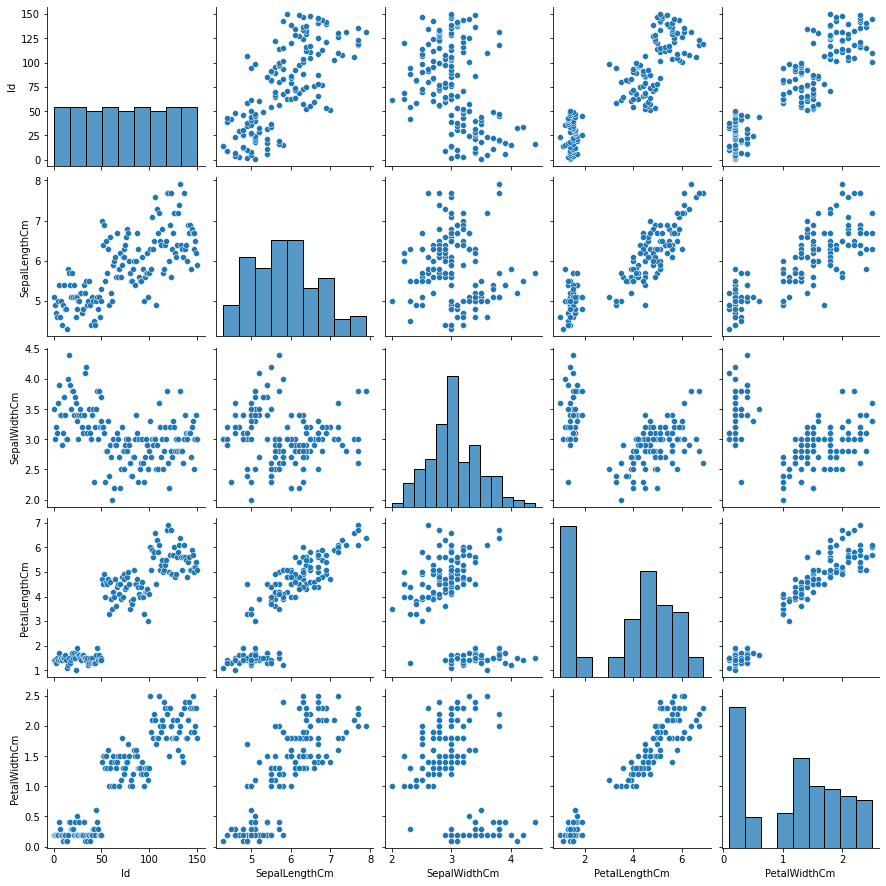

In [5]:
sns.pairplot(iris_data) 

In [6]:
 iris_data = iris_data[['PetalLengthCm', 'PetalWidthCm']] 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

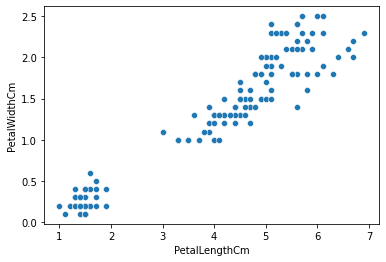

In [7]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_data)

In [8]:
iris = np.asarray(iris_data)
keys = iris.shape[0]
print(keys)

150


In [9]:
from scipy.spatial.distance import pdist, squareform

Z = squareform(pdist(iris, "euclidean"))

In [10]:
len(Z)

150

In [11]:
def chooseCluster(clusters, Z):
    '''
    Finds the index of the cluster to split
    i.e the cluster with the max dissimilarity
    between its points
    '''
    index = 0
    max_value = -inf
    for idx, cluster in enumerate(clusters):
        value = get_max_dissimilarity(cluster, Z)
        if len(clusters) > 1 and len(cluster) > 1 and value > max_value:
            max_value = value
            index = idx
    return index


def get_max_dissimilarity(cluster, Z):
    """
    Computes maximum dissimilarity
    between any 2 points of a cluster
    """
    max_distance = 0
    for i in cluster:
        for j in cluster:
            #print(Z[i][j])
            max_distance = max(max_distance, Z[i][j])
    #print(max_distance)
    return max_distance


def createNewCluster(cluster, Z):
    """
    Gets the index of the element in the cluster which
    will be split from the cluster,
    to form a new cluster
    """
    maxSumDist = 0
    newClusterIndex = 0
    index = 0

    for i in cluster:
        sumDist = 0
        for j in cluster:
            sumDist += Z[i][j]
        if sumDist > maxSumDist:
            maxSumDist = sumDist
            newClusterIndex = index
        index += 1

    return newClusterIndex


def splitPoints(clusterA, clusterB, Z):
    """
    Splits points in the original cluster
    between the old and the new clusters
    clusterA - new
    clusterB - old
    """
    if len(clusterB) == 1:
        return None

    index = None
    maxDiff, idx = 0, 0

    for i in clusterB:
        sumdistToA, sumdistToB = 0, 0
        for _ in clusterA:
            sumdistToA += Z[i][_]
        for _ in clusterB:
            sumdistToB += Z[i][_]

        avdistToA = sumdistToA/len(clusterA)
        avdistToB = sumdistToB/(len(clusterB)-1)
        diff = avdistToB - avdistToA

        if maxDiff < diff:
            maxDiff = diff
            index = idx
        idx += 1
    return index


def distBetwClusters(clusterA, clusterB, Z):
    """
    Computes the distance between 2 clusters
    min linkage
    """
    dist = 1500
    for i in clusterA:
        for j in clusterB:

            if Z[i][j] != 0:
                #print("Z[i][j]:" + str(Z[i][j]))
                dist = min(dist, Z[i][j])
    return dist


def compute_linkage(temp, X, Z):
    """
    Computes the linkage matrix
    for plotting dendrogram
    """
    temp = list(reversed(temp))
    idx = 0

    for i in range(0, len(temp)):
        Xtemp = []
        Xtemp.append(idx)
        Xtemp.append(idx+1)
        Xtemp.append(distBetwClusters(temp[i][0].copy(), temp[i][1], Z))
        Xtemp.append(len(temp[i][0]) + len(temp[i][1]))

        X.append(Xtemp)
        idx += 2
    return X


def drawDendrogram2(temp, X, Z):
    """
    Plotting the dendrogram
    """
    X2 = compute_linkage(temp, X, Z)
    X2 = np.array(X).astype(float)
    #print(X2)
    dendrogram(X2, color_threshold=1, orientation='right')
    plt.savefig('divisiveClustering.png')
    plt.show()

In [12]:
#Divisive Clustering Function...!

def DivisiveClustering(keys, Z):
    '''
    Performs Divisive Clustering
    '''
    #print(Z)
    clusters = [[i for i in range(keys)]]
    X = []
    temp = []
    while len(clusters) != keys:
        index = chooseCluster(clusters, Z)
        print("Chosen Index:%s" %(index))

        origCluster = clusters[index]
        newClusterIndex = createNewCluster(origCluster, Z)
        print("New Cluster Index:%s" %(newClusterIndex))
        newCluster = [origCluster[newClusterIndex]]
        origCluster.remove(origCluster[newClusterIndex])

        while True:
            newClusterIndex = splitPoints(newCluster, origCluster, Z)
            if newClusterIndex is None:
                break
            newCluster.append(origCluster[newClusterIndex])
            origCluster.remove(origCluster[newClusterIndex])

        # distance_bw_clusters = get_distance_bw_clusters(origCluster, newCluster)
        # length_new = len(origCluster) + len(newCluster)

        clusters[index] = origCluster.copy()
        clusters.append(newCluster.copy())
        print("My Clusters:")
        print(clusters)
        origCluster.sort()
        newCluster.sort()
        temp.append([origCluster.copy(), newCluster.copy()])
        print("length : ", len(clusters))
        #index = get_cluster_to_split(clusters, Z)
      
    return X, temp

Chosen Index:0
New Cluster Index:118
My Clusters:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 98], [118, 117, 122, 105, 131, 107, 135, 109, 100, 130, 143, 102, 125, 104, 144, 120, 124, 136, 140, 132, 108, 128, 129, 112, 103, 148, 139, 116, 137, 115, 145, 134, 111, 114, 141, 147, 110, 101, 142, 149, 113, 146, 121, 83, 77, 133, 123, 127, 119, 70, 126, 138, 52, 72, 56, 76, 86, 50, 63, 54, 106, 91, 85, 73, 58, 51, 66, 68, 78, 84, 55, 65, 75, 87, 90, 74, 97, 61, 94, 96, 95, 88, 99, 53, 71, 89, 67, 92, 59, 62, 82, 69, 80, 64, 81, 60, 79, 57, 93]]
length :  2
Chosen Index:1
New Cluster Index:0
My Clusters:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 98], [83, 77, 133, 123, 127, 119, 70, 126, 138, 52, 7

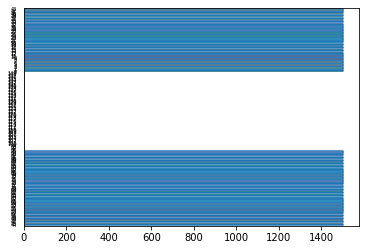

In [13]:
X, temp = DivisiveClustering(keys, Z)
drawDendrogram2(temp, X, Z)